# Machine learning avec les modules Python tensorflow2/keras 

## Entraînement / exploitation d'un réseau de neurones dense pour la reconnaissance de chiffres manuscrits

## La banque d'images MNIST

Dans ce TP nous utilisons les images de la banque MNIST disponible sur Internet (http://yann.lecun.com/exdb/mnist/).

La banque MNIST propose 70000 images en ton de gris de 28 $\times$ 28 pixels, correspondant à des matrice 28 $\times$ 28 de nombres `uint8` (entiers positifs dans l'intervalle [0 ; 255]).<br>
Les 70000 images du MNIST sont regoupées en **60000 images d'apprentissage** et **10000 images de test**.<br>
<p style="text-align:center; font-style:italic; font-size:12px;">
<img src="./img/MnistExamples.png" width="500"><br>
[crédit image : Josef Steppan — Travail personnel, CC BY-SA 4.0, commons.wikimedia.org/w/index.php?curid=64810040)]
</p>

# A/ Quelques rappels...

## Le neurone artificiel
C'est une unité de traitement informatique programmée pour calculer la valeur de sa **fonction d'activation** en un point défini par la **combinaison linéaire de ses entrées** $\Sigma_i w_i x_i - b$ :

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/nn_1.png" width="550" ><br>
    [crédit image : JLC]
</p>

L'entrée *Bias* reçoit le stimuli `-1` affecté du poids $b$ permettant de décaler le point où la fonction d'activation ets calculée.

## Fonction d'activation

Principaux rôles des fonctions d'activation des neurones artificiels :

- introdure dans le neurone artificiel un comportement **non linéaire** comme des mécanismes de seuil, de saturation...
- fixer la plage de sortie de la valeur calculée par le neurone, par exemple sortie dans l'intervalle $[-1 ; 1]$, ou $[0 ; +\infty[$

Exemples de fonction d'activation couramment utilisées :<br />
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/activationFunctions.png" width="900"><br>
    [crédit image : JLC]
</p>

# B/ Structure du réseau dense à construire 
Dans ce premier TP,  nous allons construire un **réseau dense**, avec :
- une **couche d'entrée** de 784 valeurs comprises entre 0 et 1 (les pixels de l'image 28 $\times$ 28 mis sous forme d'un vecteur de 784 valeurs),
- une **couche cachée** de 784 neurones utilisant la fonction d'activation `relu`,
- une **couche de sortie** à 10 neurones, pour la classification des images en 10 classes associées aux chiffres {0,1,2...9}, utilisant la fonction d'activation `softmax` adaptée aux problèmes de classification.

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/archiReseau.png" alt="archiReseau.png" style="width: 900px;"><br> 
    [crédit image : JLC]
</p>

Remarques : 
- Chaque neurone de la première couche cachée reçoit 785 entrées : les 784 valeurs $x_i$ des pixels de l'image plus le biais (l'entrée '-1'). 
- Il y a donc 785 inconnues pour chaque neurone : les 784 poids $w_i$ affectés à chaque entrée $x_i$, plus le  poids $b$ affecté aux biais.
- $\leadsto$ on compte donc 785 $\times$ 784 inconnues pour la couche cachée et 785 $\times$ 10 inconnues pour la couche de sortie : soit un total de 623290 inconnues dont la valeur doit être optimisée par l'algorithme d'apprentissage du réseau.

### Fonction d'activation softmax

La fonction `softmax` calcule pour chacun neurone de sortie $k$ la valeur $\displaystyle{Y_k = \frac{e^{y_k}}{\sum_i{e^{y_i}}}}$.


`softmax` associe ainsi à chacune des sorties $y_k$ une valeur $Y_k \in [0, 1]$ qui peut être interprétée comme la probablité de la sortie $k$ : on obtient une valeur proche de 1 pour le neurone fournissant la valeur $y_i$ la plus grande, et quasiment 0 pour tous les autres.

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/softmax.png" width="400"><br>
    [crédit image : JLC]
</p>


### Catégorisation des labels (*one-hot coding*)

Les labels des images sont des entiers entre 0 et 9 désignant les chiffres de '0' à '9' alors que la sortie du réseau est un vecteur de 10 éléments compris entre 0 et 1. Pour faciliter la comparaison entre le label etla  sortie du réseau, on utilise la catégorisation *one-hot coding* : chaque classe (label) est associée à un vecteur $Y'$ comportant autant d'éléments que de classes à reconnaître : les éléments du vecteur sont tous nuls sauf un, permettant d'identifier de façon unique chacune des classes.<br>

Pour notre exemple des 10 classes correspondant aux labels '0' à '9' :
- le label `0` correspond au vecteur $Y'_1 = [1 0 0 0 0 0 0 0 0 0]$.
- le label `3` correspond au vecteur $Y'_4 = [0 0 0 1 0 0 0 0 0 0]$.
- le label `9` correspond au vecteur $Y'_9 = [0 0 0 0 0 0 0 0 0 1]$.

### Calcul de l'erreur

Pendant la phase d'entraînment du réseau, chaque image fournie en entrée donne un vecteur de probabilités de sorties (réponse calculée par le réseau) qui peut être comparé à la représentation *hot-one* du label associé à l'image d'entrée.

On peut alors calculer l'erreur *cross entropy* : $-\sum_i{Y'_i.\log{Y_i}}$ qui mesure l'écart entre le label et la réponse du réseau :

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/CrossEntropy.png" width=600><br>
    (crédit image : vidéo "Deep Learning TensorFlow" de Martin Gorner)
</p>


### Backpropagation error

L'algorithme de **retropropagation de l'erreur** permet de modifier les poids des couches du réseau pour minimiser l'erreur entre valeur attendue et valeur prédite par le réseau. <br>
Au fur et à mesure des apprentissages successifs, les poids du réseau convergent vers un état qui constitue le réseau entraîné.

# B/ Travail à faire

## Environnement Python de travail

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:large"> 
    Le travail sous Python proposé dans ce TP gagne à être fait dans un <span style="font-weight:bold;">environnement Python3 dédié</span> : voir le document <span style="font-style:italic">EnvironnementPython_tf2.pdf</span> si vous n'avez pas encore créé d'environnement Python dédié pour le travail avec les modules Keras et tensorflow.
</span>
</div>

Vérification des versions des modules Python :
- Python     : doit être >= 3.6
- tensorflow : doit être >= 2.1.0
- tf.keras   : doit être 2.2.4-tf
- OpenCV     : doit être 3.4.x


## Documentation tensorflow/keras

Le module **keras** qui permet une manipulation de haut niveau des objets du module **tensorflow** est intégré dans tensorflow2.<br>
La documentation du module **tf.keras** à consulter pour ce TP est ici : https://www.tensorflow.org/api_docs/python/tf/keras.  

In [1]:
import tensorflow as tf
import sys, cv2
print(f"Version de Python    : {sys.version.split()[0]}")
print(f"Version de tensorflow: {tf.__version__}")
print(f"Version, de Keras    : {tf.keras.__version__}")
print(f"Version, de OpenCV   : {cv2.__version__}")

Version de Python    : 3.8.5
Version de tensorflow: 2.4.0
Version, de Keras    : 2.4.0
Version, de OpenCV   : 4.2.0


Incrustation des tracés matplotlib dans le cahier IPython et import de modules utiles :

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1 - Récupération des images MNIST

Consulter l'aide sur la fonction [tf.keras.datasets.mnist.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data).

Charger les données du MNIST avec la fcntion `load_data` en nommant les données renvoyées :<br>
- `im_train` et `im_test` pour les images d'entraînement et de test,
- `lab_train` et `lab_test` pour les labels des données d'entraînement et de test.

In [3]:
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()

Faire afficher les attributs `shape` et `dtype` des tableaux obtenus et valider les réponses :

In [4]:
im_train.shape, im_train.dtype, im_test.shape, im_test.dtype

((60000, 28, 28), dtype('uint8'), (10000, 28, 28), dtype('uint8'))

In [5]:
lab_train.shape, lab_train.dtype, lab_test.shape, lab_test.dtype

((60000,), dtype('uint8'), (10000,), dtype('uint8'))

## Visualisation des images et des étiquettes :

Avec la fonction `imshow` du module `matplotlib.pyplot` faire afficher en tons de gris la 601-ème image du tableau `im_train`.<br><br>
Indications :
- utiliser `plt.figure(figsize=(2,2))` pour fixer la taille de l'image
- utiliser l'option `cmap='gray'` de `imshow` pour l'affichage en ton de gris
- enlever les graduations en X et Y avec l'instruction  `plt.xticks([]); plt.yticks([])`.

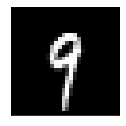

In [6]:
plt.figure(figsize=(2,2))
plt.imshow(im_train[600], cmap='gray')
plt.xticks([]); plt.yticks([]);

Vérifier que l'étiquette associée à `image_train[600]` correspond bien à ce qu'on voir sur l'image....

In [7]:
lab_train[600] == 9

True

Écrire une fonction `plot_image` d'arguments `images, r, L, C` qui affiche les images du tableau `images` (tableau de matrices) en commençant au rang `r` dans une grille d'images de `L` lignes et `C` colonnes. La taille de la figure (option`figsize` de `plt.figure`) sera fixée pour chaque image de la grille soit de taille `(1,1)`.<br>
*Indications* : utiliser `plt.subplot(L,C,n)` pour positionner la nième image dans la grille des L x C images.

In [8]:
def plot_image(images, r,L,C):
    plt.figure(figsize=(C,L))
    for i in range(L*C):
        plt.subplot(L, C, i+1)
        plt.imshow(images[r+i], cmap='gray')
        plt.xticks([]); plt.yticks([])

Faire afficher les images d'entraînement à partir de la 601 ème dans une grille de 4 x 6 :

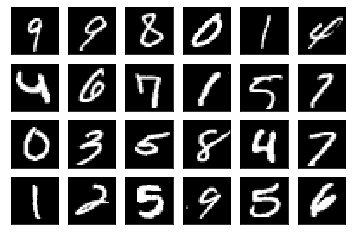

In [9]:
plot_image(im_train, 600, 4, 6)

Faire afficher les images de test à partir de la 601 ème dans une grille de 4 x 6 :

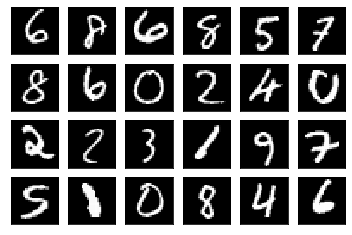

In [10]:
plot_image(im_test, 600, 4, 6)

# 2 - Pré-traitement des données

Pour adapter les données au réseau de neurones, on va transformer les matrice d'entiers `uint8` représentant les images 28 x 28 pixels en vecteurs **normalisés** $(V_i)_{i=0..783}$ de 784 valeurs réelles $V_i$  avec $ 0 \leqslant V_i \leqslant 1.$<br />

*Nota* : une autre façon de faire consisterait à garder les matrices d'entiers en utilisant l'option de du module **keras** qui permet de dire que la couche d'entrée est constituée de matrices (cf le TP2 qui met en oeuvre un réseau convolutionnel).

## 2.1 - Transformation des matrices d'entrée en vecteurs normalisés :

Pour paramétrer les traitements, on récupère :
- le nombre d'images d'entraînement (`nb_im_train` et `nb_im_test`)
- le nombre de pixels des images (`nb_pixels`)

In [11]:
# compléter la cellule...
nb_im_train = im_train.shape[0]
nb_im_test  = im_test.shape[0]
nb_pixels   = im_train[0].size        # normalement : 28 x 28 = 784 pixels
print(f"{nb_im_train} images d'entraînement et {nb_im_test} images de test")
print(f"{nb_pixels} pixels dans chaque image")

60000 images d'entraînement et 10000 images de test
784 pixels dans chaque image


Définir les tableaux `x_train` et `y_train` contenant les matrices des tableaux `im_train` et `im_test` *mises à plat* sous forme de vecteurs normalisés (valeurs comprises entre 0 et 1).<br>
*indications* : utiliser la méthode `reshape` des tableaux ndarray :

In [12]:
x_train = im_train.reshape((nb_im_train, nb_pixels))/255
x_test  = im_test.reshape((nb_im_test, nb_pixels))/255

Vérifier que les dimensions des tableaux `x_train` et `x_test` sont bien celles attendues :

In [13]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Vérifier que les valeurs min et max des tableaux `x_train` et `x_test` sont bien celles attendues :

In [14]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [15]:
x_test.min(), x_test.max()

(0.0, 1.0)

## 2.2 - Codage *one-hot*  des labels:

Consulter la page sur la fonction `to_categorical` [tf.keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) : en déduire comment définir les tableaux  `y_train` et `y_test` traduction *hot-one* des tableaux `lab_train` et `lab_test` :

In [16]:
from tensorflow.keras.utils import to_categorical
# 'one-hot' encoding' des labels :
y_train = to_categorical(lab_train)
y_test  = to_categorical(lab_test)

Vérifier visuellement les 10 premières valeurs de `lab_train` et les valeurs de `y_train` correspondantes :

In [17]:
lab_train[:10], y_train[:10]

(array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8),
 array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))

# 3 - Construction du réseau de neurones :

On va maintenant construire un réseau de neurones **séquentiel** en **4 lignes** Python à l'aide du module **keras**.

Les spécifications du réseau de neurones dense à construire sont :

- Entrées : constituées des 784 pixels, mis sous forme d'un vecteur normalisé de 784 `float` de valeurs dans [0, 1];
- Première couche : 784 neurones avec fonction d'activation `relu` (voir la page [tf.keras.activation.relu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu))
- Couche de sortie : 10 neurones avec fonction d'activation `softmax` pour convertir les sorties en probalibilités permettant de choisir une des 10 classes (voir la page [tf.keras.activation.softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax))
- Fonction d'erreur : `categorical_crossentropy` (voir la page [tf.keras.categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy) :
- Optimisation des poids des neurones par rétro-progation de l'erreur : algorithme de descente de gradient ADAM [tf.keras.optimizers.Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) 

### Rendre les tirages aléatoires reproductibles

Les poids d'un réseau de neurones sont initialisés par tirage aléatoire ; lorsqu'on invoque plusieurs fois de suite des générateurs aléatoires (comme `numpy.random.rand`...) on constate qu'à chaque invocation, on obtient une suite de valeurs aléatoires différentes :

In [18]:
print(np.random.rand(5))
print(np.random.rand(5))

[0.97353269 0.95158695 0.02915914 0.69609539 0.33370558]
[0.98344224 0.47804394 0.05708574 0.99773449 0.95682952]


In [19]:
print(np.random.rand(5))
print(np.random.rand(5))

[0.90468554 0.88462568 0.41963437 0.36520721 0.18166804]
[0.72086243 0.26899628 0.53802029 0.52819519 0.73529592]


Ceci peut présenter un problème quand on veut étudier les performances d'un réseau entraîné en fonction de paramètres de construction : à chaque fois qu'on relance la cellule ou le notebook avec de nouvelles valeurs des paramètres, on obtient un état initial du réseau différent conduisant à un résultat de réseau entraîné différent...

Pour éviter ce comportement, on peut fixer la **graine** (*seed*) des générateurs aléatoires de façon à produire des suites de nombres aléatoires **reproductibles**.<br>
Les cellules suivantes illustrent le procédé :

In [20]:
seed = 43

In [21]:
np.random.seed(seed)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

In [22]:
np.random.seed(seed)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

## Construction du réseau de neurones dense 

Compléter la cellule ci-dessous pour instancier l'objet `model` selon les spécifications du réseau données, et en vous aidant des  :
- de la classe `Sequential` : page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)
- de la classe `Dense` : page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

Compiler `model` avec la mèthode `compile` (cf page []()) en utilisant :
- la fonction d'erreur `categorical_crossentropy`
- l'optimiseur `adam`
- la métrique `accuracy`, qui permettra de tracer les courbes de performance.

In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

nb_classes = 10
np.random.seed(43)

# les 4 lignes pour construire le réseau de neurones:
model = Sequential()
model.add(Dense(nb_pixels, input_dim=nb_pixels, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Avec la méthode `summary` de l'objet `model`, faire afficher la description du modèle : retrouver les valeurs des paramètres...

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


Retrouver le nombre total de paramètres avec une formule simple ...

In [25]:
785*784+785*10

623290

### Sauvegarder l'état initial du  réseau

On peut sauvegarder l'état initial des poids du réseau non-entraîné (valeurs aléatoires) avec la méthode `Model.save_weights`. <br>
Ce sera utile plus loin pour remettre le réseau à son état initial avant de relancer d'autres entraînements :

In [26]:
import os
if not os.path.exists("weights"): os.mkdir("weights")
model.save_weights('weights/initial')

files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith("initial")]
for f in files: print(f)

weights/initial.data-00000-of-00001
weights/initial.index


Attention : on donne le nom `"initial"` mais la méthode `Model.save_weights` l'utilise pour créer plusieurs fichiers préfixés par `"initial"`.<br>
Lors de la lecture ultérieure des poids du réseau avec la méthode `Model.load_weights` il suffira de donner le même nom pour que cela fonctionne.

# 4 - Entraînement du réseau :

Le modèle est entraîné sur les $60\,000$ images :
- en utilisant :
    - les données d'entrée `x_train` (images mises à plat normalisées)
    - les données de sortie `y_train` (labels one-hot codées).
- un certain nombre de fois de suite (on pourra commencer avec 5) donné par le paramètre `epochs` , 
- avec mises à jour des poids (*back propagation*) toutes les 200 images (paramètre `batch_size`)

In [27]:
# au cas on on exécuterait plusieurs fois cette cellule, il faut 
# prendre soin de bien de ré-initialiser les poids du réseau à leur valeurs aléatoires...
model.load_weights("weights/initial") 

hist = model.fit(x_train, y_train, 
                 epochs=5, 
                 batch_size=200, 
                 verbose=1)

Epoch 1/5
300/300 [==============================] - 3s 9ms/step - loss: 0.4836 - accuracy: 0.8655
Epoch 2/5
300/300 [==============================] - 3s 12ms/step - loss: 0.1229 - accuracy: 0.9644
Epoch 3/5
300/300 [==============================] - 3s 9ms/step - loss: 0.0728 - accuracy: 0.9791
Epoch 4/5
300/300 [==============================] - 3s 9ms/step - loss: 0.0499 - accuracy: 0.9866
Epoch 5/5
300/300 [==============================] - 3s 10ms/step - loss: 0.0331 - accuracy: 0.9911


le résultat `hist` est un objet de type `tensorflow.python.keras.callbacks.History`, qui possède un attribut `history` de type `dict`, avec les clefs `loss` et `accuracy`

In [28]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [29]:
hist.history['loss']

[0.27658703923225403,
 0.11160886287689209,
 0.07073900103569031,
 0.04996959865093231,
 0.035989824682474136]

### Tracé des courbes `accuracy` et `loss` :

La fonction `plot` du module `utils` (présent dans le répertoire du notebook) permet de tracer les courbes de précision et de perte en utilisant les données stockées dans l'objet `hist` :

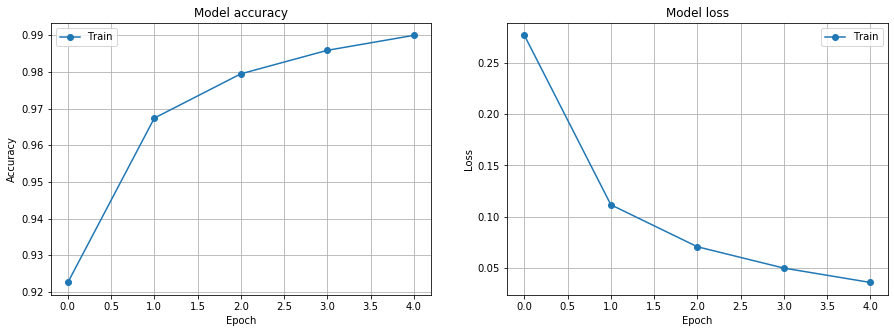

In [30]:
from utils import plot
plot(hist)

On peut penser qu'augmenter le nombre d'`epochs` peut permettre d'aumengenter les performances du réseau... mais en fait on court le risque de sur-entraînner le réseau (*over-fit*)

## 4.1 - Entraînement du réseau avec tests pendant l'entraînement

Pour avoir un meilleur indicateur sur la qualité de l'entraînement du réseau, il est intéressant de tester à chaque `epoch` la précison du réseau entraîné en utilisant les données de test. Ceci permet d'avoir une meilleur évaluation de l'évolution de la précision du réseau calculée avec les données du test (clef `val_accuracy`) :

In [31]:
model.load_weights("weights/initial")

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test), # jeu de données qui sera utilé à la fin de cheque epoch
                 epochs=10, 
                 batch_size=200, 
                 verbose=1)

Epoch 1/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2415 - accuracy: 0.9287 - val_loss: 0.1141 - val_accuracy: 0.9662
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0937 - accuracy: 0.9723 - val_loss: 0.0820 - val_accuracy: 0.9761
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0614 - accuracy: 0.9819 - val_loss: 0.0725 - val_accuracy: 0.9785
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0428 - accuracy: 0.9876 - val_loss: 0.0654 - val_accuracy: 0.9794
Epoch 5/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.0611 - val_accuracy: 0.9813
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0219 - accuracy: 0.9946 - val_loss: 0.0563 - val_accuracy: 0.9827
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 0.0566 - val_accuracy: 0.9825
E

On a cette fois non seulement les valeurs `loss` et `accuracy` mais aussi `val_loss` et `val_accuracy` calculées en faisant tourner le réseau à chaque `epoch` avec les données de test :

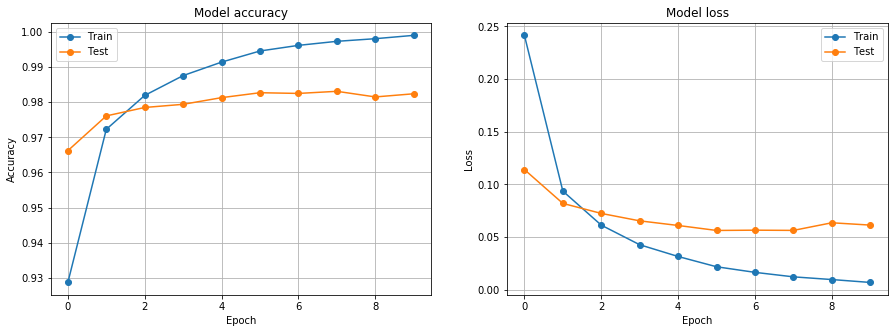

In [32]:
plot(hist)

On voit clairement que la précision calculée avec les données de Test tend vers une limite voisine de 0.98 . <br />
Les performances du réseau peuvent même se dégrader si on continue l'entraînement (phénomène connu sous le nom de sur-apprentissage (aka *over fiting*).

### Arrêter l'entrainement avant l'*over-fit*

Keras propose des mécanismes permettant d'arrêter automatiquement l'apprentissage en surveillant par exemple la croissance de la précision d'une `epoch` à l'autre.<br>
Ce point est traité dans le notebook `TP2_MNIST_dense_overfit.ipynb`.

### Sauvegarder les poids du  réseau entraîné

La méthode `Model.save_weights` permet d'enregistrer les **poids** du réseau entraïné dans un fichier :

In [33]:
import os
if not os.path.exists("weights"): os.mkdir("weights")
model.save_weights('weights/check_points')
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith("check")]
for f in files: print(f)

weights/checkpoint
weights/check_points.data-00000-of-00001
weights/check_points.index


### Sauvegarder la strucure du réseau et ses poids

La méthode `Model.save` permet d'enregistrer **toute la structure et les poids** du réseau entraïné dans un fichier.<br />
Ceci permet de recréer plus tard *from scratch* le réseau entrainé pour passer en phase exploitation du réseau par exemple, en utilisant la fonction`tf.keras.models.load_model` :

In [34]:
import os
if not os.path.exists("models"): os.mkdir("models")
model.save('models/model1') 
files=[os.path.join("models",f) for f in os.listdir("models") if f.startswith("model")]
for f in files: print(f)

INFO:tensorflow:Assets written to: models/model1/assets
models/model1


# 5/ Vérication de l'apprentissage avec le jeu de test

La méthode `predict` permet de demander au modèle sa prédiction pour une ou plusieurs entrées.<BR />
Exemple de prédition pour une image test numéro i dans le jeu d'images de test (0 <= i <= 10000) :

valeur trouvée par le réseau de neurones pour la 1000ème image :
	[0.0000 0.0000 0.0000 0.0002 0.0000 0.0000 0.0000 0.0002 0.0000 0.9996]

valeur arrondie à 1 chiffre : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
rep[0].argmax() donne : 9

La bonne réponse est 9, soit en 'hot coded' : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]


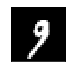

In [35]:
i = 1000
rep = model.predict(x_test[i:i+1])

np.set_printoptions(formatter={'float':'{:0.4f}'.format})
print(f"valeur trouvée par le réseau de neurones pour la {i}ème image :\n\t{rep[0]}\n")

np.set_printoptions(formatter={'float':'{:0.1f}'.format})
print(f"valeur arrondie à 1 chiffre : {rep[0]}")
print(f"rep[0].argmax() donne : {rep[0].argmax()}")

plt.figure(figsize=(1,1))
digit = im_test[i]
plt.imshow(digit, cmap='gray');
plt.xticks([]); plt.yticks([])

print(f"\nLa bonne réponse est {lab_test[i]}, soit en 'hot coded' : {y_test[i]}")

Écrire les instructions Python pour calculer avec les données de test le pourcentage d'erreur du réseau entrainé.... <br/> 
Conseil: la variable rep contient pour chaque image une liste de 10 probabilités, il pourra être utile d'utiliser la fonction `argmax` de la librairie numpy pour obtenir le chiffre de plus haute probabilité.

In [36]:
results = model.predict(x_test)
bonne_rep = 0
for i, res in enumerate(results):
    bonne_rep += (np.argmax(res) == lab_test[i])
print(f"taux de réussite : {bonne_rep/len(x_test)*100:.2f} %")

taux de réussite : 98.24 %


### 5.1 - Afficher la matrice de confusion

La cellule suivante affiche la **matrice de confusion** en utilisant les modules `sklearn` et `seaborn` :

False predictions: 176/10000
Pred: [9 2 7 3 4 0 2 2 7 8 1 3 8 7 7 9 4 2 0 5 6 8 4 2 4 9 5 1 3 9 3 3 7 6 6 6 7
 8 2 3 4 0 9 3 4 9 1 0 7 0 1 2 6 0 0 1 4 4 4 4 3 1 0 1 4 3 7 0 2 7 5 5 2 9
 9 0 1 4 0 5 3 2 6 8 4 1 4 4 6 3 2 5 4 2 3 3 3 7 4 9 7 7 8 7 4 2 2 7 7 7 5
 4 4 3 7 5 3 4 6 8 4 8 5 4 6 8 5 3 7 5 7 9 3 3 8 9 9 9 3 9 7 6 7 4 5 7 6 4
 4 7 3 4 0 8 4 4 6 6 2 2 2 5 4 7 3 7 6 0 6 0 0 7 5 4 7 8]
Real: [2 4 2 5 9 6 8 8 2 1 2 7 5 8 9 8 5 1 6 6 4 7 9 7 9 4 9 7 8 7 5 2 8 4 2 0 3
 2 6 8 9 2 0 8 8 4 8 2 3 6 6 1 5 8 9 9 9 6 9 2 5 7 9 6 9 5 4 8 3 9 3 8 1 5
 8 6 9 6 5 8 9 7 4 7 0 7 9 9 5 1 4 3 9 0 9 8 2 2 6 7 1 9 2 2 9 3 3 8 2 9 6
 7 8 8 8 3 8 9 8 0 8 3 8 6 1 1 1 4 3 8 9 4 5 5 3 3 3 3 9 8 9 2 0 8 0 8 1 9
 6 2 0 2 8 2 8 6 0 8 7 7 7 8 9 2 6 9 5 4 5 2 5 4 6 9 2 3]


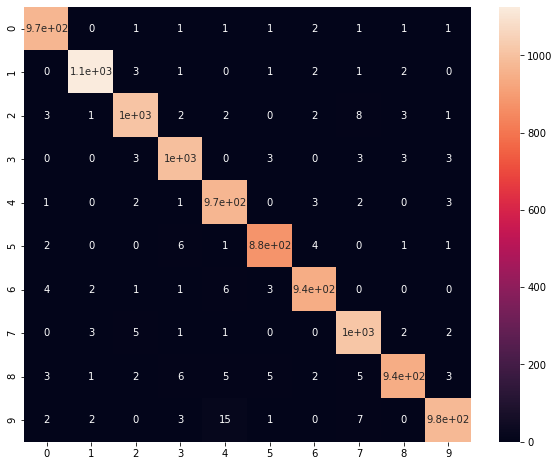

In [37]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix

classes   = np.array([0,1,2,3,4,5,6,7,8,9])
predicted = np.argmax(model.predict(x_test), axis=-1)
target    = np.argmax(y_test, axis=1)

fail = [x != y for x,y in zip(predicted, target)]
print("False predictions: %d/%d" % (np.sum(fail), len(results)))
print("Pred:", predicted[fail])   # print only predicted[True] skipping predicted[False]
print("Real:", target[fail])

cm = confusion_matrix(target,predicted)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(10,8))
sn.heatmap(df_cm, annot=True)
plt.show()

# 6/ Évolution du réseau : augmentation du nombre de couches cahées 

On peut essayer de construire un réseau avec plus de couches. Par exemple :
- couche d'entrée avec les 784 pixels
- couche cachée 1 : 784 neurones, fonction d'activation `relu`
- couche cachée 2 : 300 neurones, fonction d'activation `relu`
- couche cachée 3 : 100 neurones, fonction d'activation `relu`    
- couche de sortie : 10 neurone, fonction d'activation `softmax`.

Construire le réseau `model2` correspondant avec Keras...

In [38]:
np.random.seed(43)
model2 = Sequential()
model2.add(Dense(784, input_dim=784, activation='relu'))
model2.add(Dense(300, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Avec la méthode `summary` de l'objet `model2`, faire afficher la description du modèle : expliquer les valeurs des paramètres...

In [39]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 882,050
Trainable params: 882,050
Non-trainable params: 0
_________________________________________________________________


`plot_model` permet de dessiner la structure du réseau :

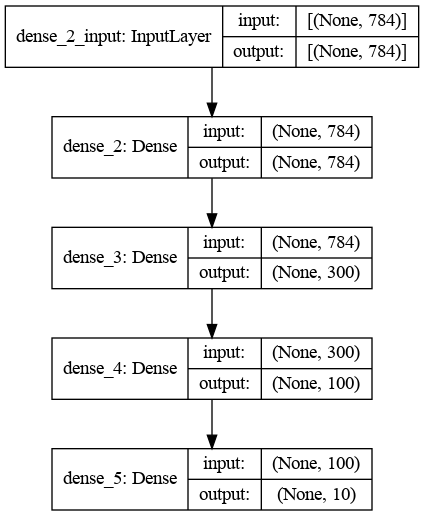

In [40]:
tf.keras.utils.plot_model(model2, show_shapes=True)

Entraînner le réseau `model2` avec les mêmes données que `model`, et faire tracer les courbes de précission et d'erreur :

In [41]:
hist2 = model2.fit(x_train, y_train, 
                   validation_data=(x_test, y_test), 
                   epochs=10, 
                   batch_size=200, 
                   verbose=1)

Epoch 1/10
300/300 [==============================] - 5s 15ms/step - loss: 0.4596 - accuracy: 0.8627 - val_loss: 0.0958 - val_accuracy: 0.9701
Epoch 2/10
300/300 [==============================] - 4s 15ms/step - loss: 0.0855 - accuracy: 0.9745 - val_loss: 0.0739 - val_accuracy: 0.9763
Epoch 3/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0528 - accuracy: 0.9836 - val_loss: 0.0743 - val_accuracy: 0.9782
Epoch 4/10
300/300 [==============================] - 4s 15ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0672 - val_accuracy: 0.9799
Epoch 5/10
300/300 [==============================] - 4s 15ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0662 - val_accuracy: 0.9798
Epoch 6/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.0668 - val_accuracy: 0.9818
Epoch 7/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0753 - val_accuracy: 0.9797

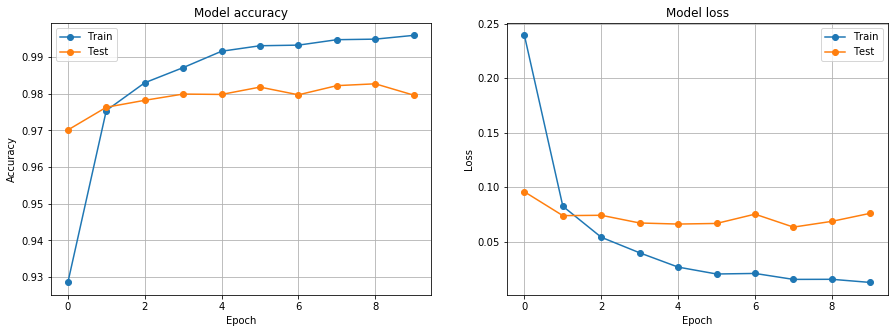

In [42]:
plot(hist2)

Augmenter le nombre de couches a t'il un impact sur les performances du réseau ?<br />
Que peut on conclure sur l'utilité de complexifier ce type de réseau ?

Double-clic ici pour inscrire ta réponse : pas vraimment => ce n'est pas utile de complexifier le réseau.

# 7/ Utiliser le réseau avec ses propres images

On va utiliser le réseau entrainé pour voir comment il réagit avec des chiffres "écrits à la main" différents des chiffres de la banque MNIST...<br />
Pour cela on utilise les images du dossier `chiffres` :

In [43]:
import os
images = ['chiffres/'+f for f in os.listdir('chiffres') if f.endswith(".png")]
images.sort()
print("Images du dossier 'chiffres' :")
for im in images: print(im)

Images du dossier 'chiffres' :
chiffres/0_jlc.png
chiffres/1_jlc.png
chiffres/2_jlc.png
chiffres/3_jlc.png
chiffres/4_jlc.png
chiffres/5_jlc.png
chiffres/6_jlc.png
chiffres/7_jlc.png
chiffres/8_jlc.png
chiffres/9_jlc.png


### Lecture des fichiers image avec openCV

In [44]:
import cv2
# lecture des images -> matrices ndarray 28x28 
input_data = [255-cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2GRAY) for image in images]
input_data = np.array(input_data)
input_data.shape, input_data.dtype  # on doit avoir 10 matrices de 28 x 28 valeurs 

((10, 28, 28), dtype('uint8'))

#### Visualistion des images :

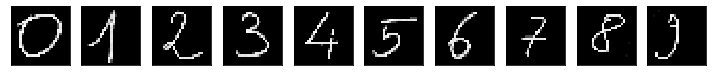

In [45]:
plt.figure(figsize=(15,5))
for i,M in enumerate(input_data):  
    plt.subplot(1,12,i+1)
    plt.imshow(input_data[i], cmap='gray', interpolation='none');
    plt.xticks([]); plt.yticks([])

transformation des matrices 28x28 en vecteurs de float normalisés :

In [46]:
nb_images = input_data.shape[0]
# mise 'à plat' des matrices sous forme de vecteurs de floats normalisés :
x_photo = input_data.reshape(nb_images, 28*28)/255.

prédiction du réseau entrainé, avec les images perso :

In [47]:
np.set_printoptions(formatter={'float': '{:0.2f}'.format})  # demander à numpy d'afficher 2 décimales

rep = model.predict(x_photo)
print(rep)

[[0.57 0.00 0.19 0.09 0.00 0.11 0.00 0.00 0.00 0.03]
 [0.00 0.90 0.00 0.02 0.01 0.01 0.01 0.01 0.02 0.02]
 [0.00 0.00 0.99 0.00 0.00 0.00 0.00 0.00 0.01 0.00]
 [0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00]
 [0.00 0.01 0.01 0.00 0.00 0.10 0.88 0.00 0.00 0.00]
 [0.00 0.14 0.09 0.11 0.21 0.01 0.00 0.42 0.02 0.00]
 [0.06 0.00 0.03 0.09 0.01 0.05 0.06 0.00 0.69 0.00]
 [0.00 0.00 0.00 0.98 0.00 0.02 0.00 0.00 0.00 0.00]]


In [48]:
[r.argmax() for r in rep]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 3]

In [49]:
for r in rep:
    print(f"{r.argmax()} avec la probablilité {r.max():.2f}")

0 avec la probablilité 0.57
1 avec la probablilité 0.90
2 avec la probablilité 0.99
3 avec la probablilité 1.00
4 avec la probablilité 1.00
5 avec la probablilité 1.00
6 avec la probablilité 0.88
7 avec la probablilité 0.42
8 avec la probablilité 0.69
3 avec la probablilité 0.98


False predictions: 1/10
Pred: [3]
Real: [9]


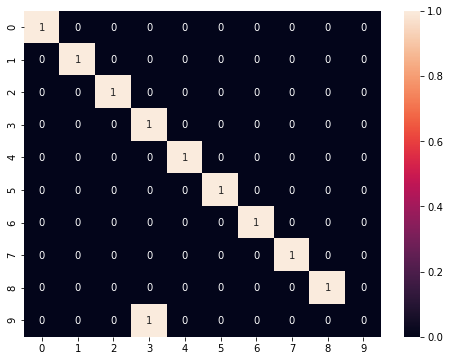

In [50]:
classes = np.array([0,1,2,3,4,5,6,7,8,9])

predicted = np.array([r.argmax() for r in rep])
target    = np.array([0,1,2,3,4,5,6,7,8,9])

fail = [x != y for x,y in zip(predicted, target)]
print("False predictions: %d/%d" % (np.sum(fail), len(predicted)))
print("Pred:", predicted[fail])   # print only predicted[True] skipping predicted[False]
print("Real:", target[fail])

cm = confusion_matrix(target,predicted)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(8,6))
sn.heatmap(df_cm, annot=True)
plt.show()

Avec le deuxième réseau dense :

In [51]:
rep = model2.predict(x_photo)
print(rep)

[[0.99 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.98 0.00 0.00 0.00 0.00 0.00 0.00 0.02 0.00]
 [0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.98 0.01 0.00 0.01 0.00]
 [0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.01 0.08 0.00 0.80 0.02 0.00 0.08 0.00]
 [0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00]]


In [52]:
[r.argmax() for r in rep]

[0, 1, 2, 3, 4, 5, 5, 3, 5, 3]

In [53]:
for r in rep:
    print(f"{r.argmax()} avec la probablilité {r.max():.2f}")

0 avec la probablilité 0.99
1 avec la probablilité 0.98
2 avec la probablilité 1.00
3 avec la probablilité 1.00
4 avec la probablilité 1.00
5 avec la probablilité 1.00
5 avec la probablilité 0.98
3 avec la probablilité 1.00
5 avec la probablilité 0.80
3 avec la probablilité 1.00


False predictions: 4/10
Pred: [5 3 5 3]
Real: [6 7 8 9]


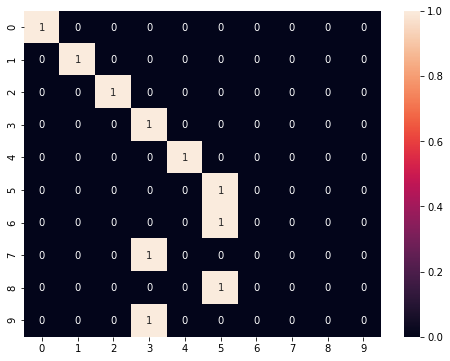

In [54]:
classes = np.array([0,1,2,3,4,5,6,7,8,9])

predicted = np.array([r.argmax() for r in rep])
target    = np.array([0,1,2,3,4,5,6,7,8,9])

fail = [x != y for x,y in zip(predicted, target)]
print("False predictions: %d/%d" % (np.sum(fail), len(predicted)))
print("Pred:", predicted[fail])   # print only predicted[True] skipping predicted[False]
print("Real:", target[fail])

cm = confusion_matrix(target,predicted)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(8,6))
sn.heatmap(df_cm, annot=True)
plt.show()

beaucoup mieux ?

Les résultats montrent :
- que le réseau à 1 seule couche cachée et à 2 couches cachées donnent des performances proches pour les images MNIST,
- que l'apprentissage d'un réseau dense reste assez sensible à la nature du jeu de données : les images de chiffres faites 'maison' ne ressemblent pas tout à fait à celles de la banque MNIST, d'où des erreurs de classification avec un simple réseau dense.

# La suite....

Pour aller au-delà des 98% de reconnaissance des chiffres, il faut passer à une autre architecture de réseau plus adaptée au traitement des images : les réseaux **convolutionnels**, traités dans le prochain cahier IPython `TP3_MNIST_convol.ipynb`.

# Autres ressources intéressantes... des vidéos :

In [64]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [1]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [3]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>